In [3]:
import os
import sys

# Add the parent directory to the Python path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

dataset size:  160
	Epoch 1 	Average Loss: 27.12750415802002
	Epoch 2 	Average Loss: 24.6403528213501


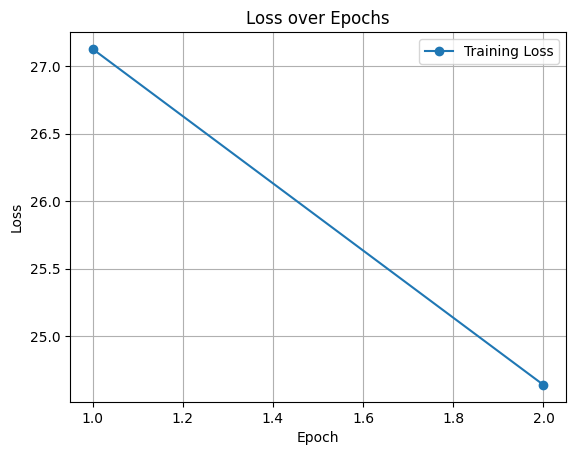

Training complete. Best model saved to models/water_multiscale//best_model.pth and the latest model saved to models/water_multiscale//last_model.pth


In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from VAE_SubEnv.modules.dataset import *
from VAE_SubEnv.modules.seeds import *
from VAE_SubEnv.modules.architecture import *
from VAE_SubEnv.modules.trainer import *

audio_path = 'sounds/water_augmented.wav'

frame_size, N_filter_bank, param_per_env = 17640, 24, 512
hidden_size, deepness = 512, 3
latent_dim = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sr = 44100
seed = seed_maker(frame_size, sr, N_filter_bank)
seed = seed.to(device)

settings = {
    'frame_size': frame_size,
    'hidden_size': hidden_size,
    'deepness': deepness,
    'latent_dim': latent_dim,
    'N_filter_bank': N_filter_bank,
    'param_per_env': param_per_env,
    }

#Dataset loading
dataset = VAE_Dataset(audio_path, frame_size, sr, N_filter_bank)
dataset_list = dataset.compute_dataset()
print("dataset size: ", len(dataset_list))
dataloader = DataLoader(dataset_list, batch_size=16, shuffle=True)

#Model loading
modelo = VAE_SubEnv(hidden_size, deepness, latent_dim, N_filter_bank, param_per_env, seed, device)

#Optimizer
optimizer = optim.Adam(modelo.parameters(), lr=1e-3)

#Training
model_path = 'models/water_multiscale/'
train_multiscale_loss(modelo, optimizer, 2, device, dataloader, model_path, settings)

dataset size:  160
	Epoch 1 	Average Loss: 12.760260772705077
	Epoch 2 	Average Loss: 12.338673877716065


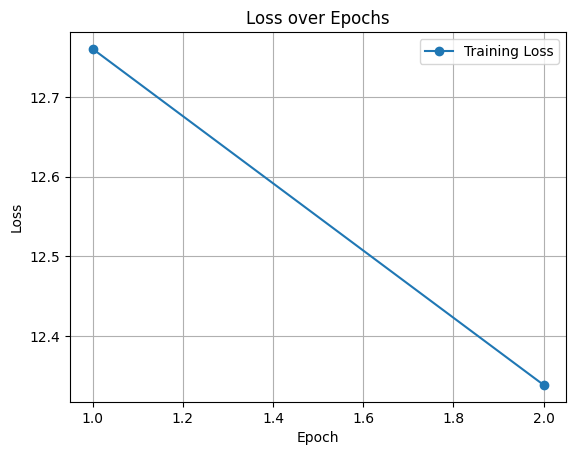

Training complete. Best model saved to models/water_statistics//best_model.pth and the latest model saved to models/water_statistics//last_model.pth


In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from modules.dataset import *
from modules.seeds import *
from modules.architecture import *
from modules.trainer import *

audio_path = 'sounds/water_augmented.wav'

frame_size, N_filter_bank, param_per_env = 17640, 24, 512
hidden_size, deepness = 512, 3
latent_dim = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sr = 44100
seed = seed_maker(frame_size, sr, N_filter_bank)
seed = seed.to(device)

settings = {
    'frame_size': frame_size,
    'hidden_size': hidden_size,
    'deepness': deepness,
    'latent_dim': latent_dim,
    'N_filter_bank': N_filter_bank,
    'param_per_env': param_per_env,
    }

#Dataset loading
dataset = VAE_Dataset(audio_path, frame_size, sr, N_filter_bank)
dataset_list = dataset.compute_dataset()
print("dataset size: ", len(dataset_list))
dataloader = DataLoader(dataset_list, batch_size=16, shuffle=True)

#Model loading
modelo = VAE_SubEnv(hidden_size, deepness, latent_dim, N_filter_bank, param_per_env, seed, device)

#Optimizer
optimizer = optim.Adam(modelo.parameters(), lr=1e-3)

model_path = 'models/water_statistics/'
train_statistics_loss(modelo, optimizer, 2, device, dataloader, model_path, N_filter_bank, frame_size, sr, settings)